**Name: Vaishnavi Kesharinath Shirsekar. **

**Project Name: Face Recognition Analysis Using Machine Learning on Olivetti Faces Dataset**

In [18]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np

# Load Olivetti Faces dataset
olivetti_faces = fetch_olivetti_faces(shuffle=True, random_state=42)

# Access the images and corresponding targets
images = olivetti_faces.images
target = olivetti_faces.target


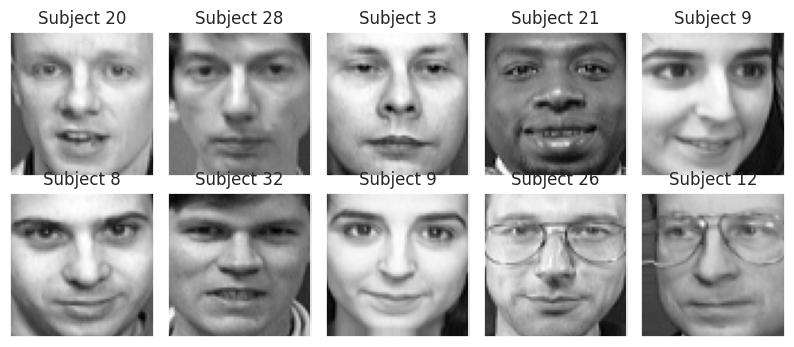

In [19]:
# Display a few images
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(10, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Subject {target[i]}')

plt.show()


**Dataset Overview**

In [20]:
#Dataset Overview
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

print(f"Number of samples: {len(images)}")
print(f"Image dimensions: {images.shape[1:]}")
print(f"Number of unique individuals: {len(np.unique(target))}")




Number of samples: 400
Image dimensions: (64, 64)
Number of unique individuals: 40


In [21]:
#print unique target variables
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


**Displaying 40 Distinct people**

In [22]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()

    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")


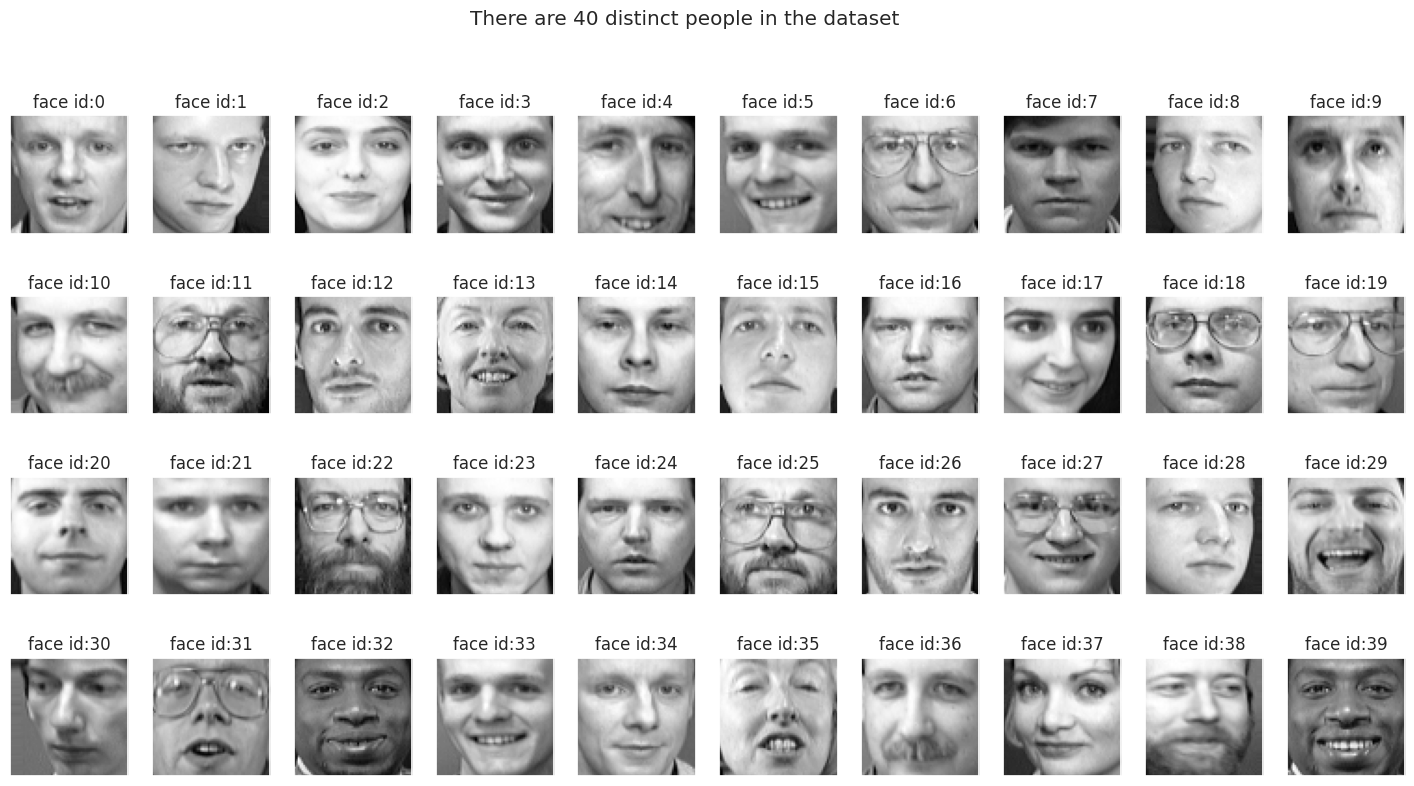

In [23]:
show_40_distinct_people(images, np.unique(target))

**Confusion Matrix**

[[2 0 0]
 [0 0 1]
 [1 0 2]]


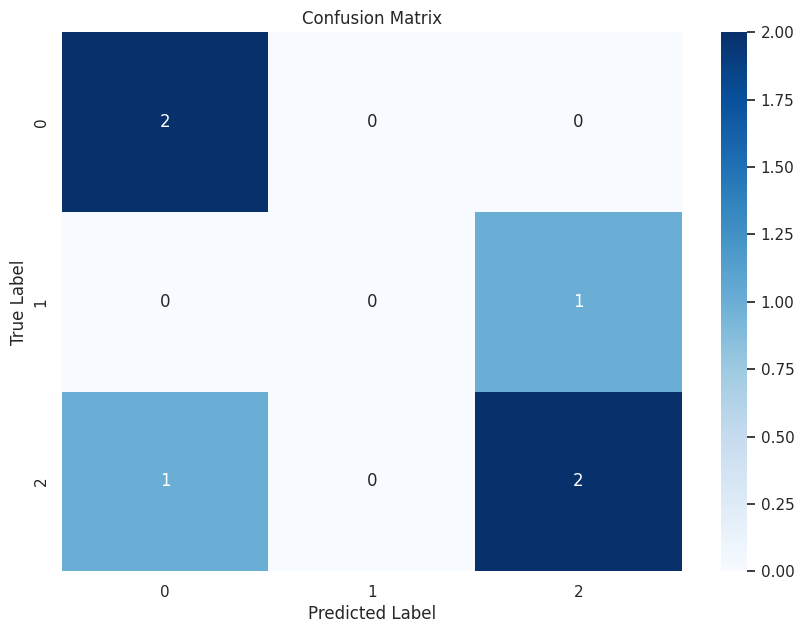

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

# Assuming y_true are your true labels and y_pred are the predictions made by your model
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

# Compute confusion matrix
matrix = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print(matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**Pixel Intensity**

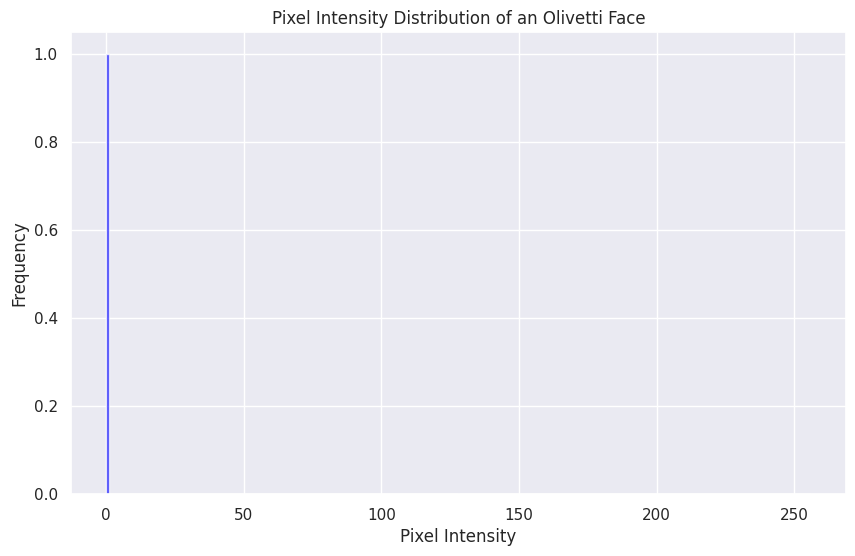

In [25]:
# Flatten the images to 1D arrays
flat_images = images.reshape((len(images), -1))

# Plot the pixel intensity distribution
plt.figure(figsize=(10, 6))
plt.hist(flat_images[0], bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution of an Olivetti Face')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()



**Correlation Between pixels**

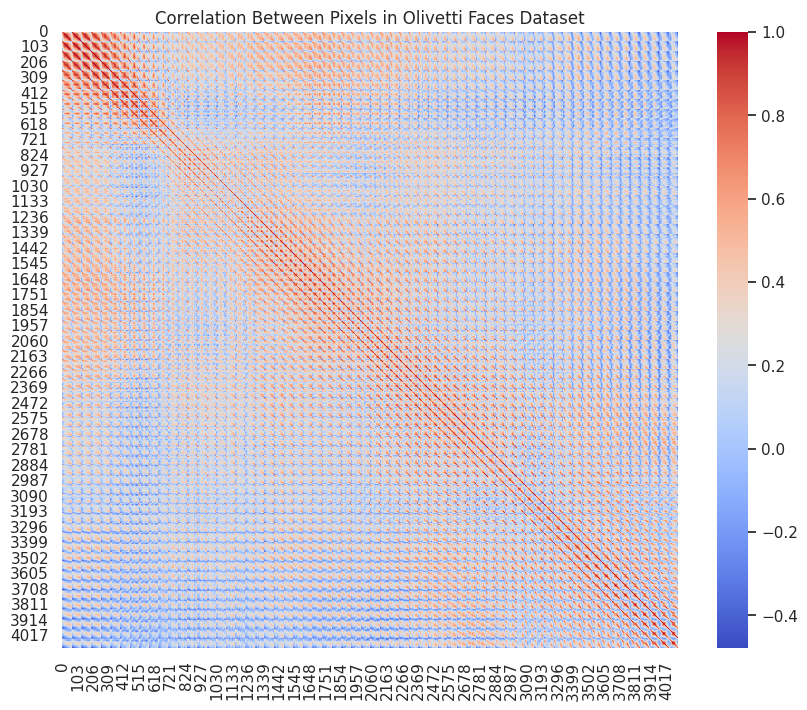

In [26]:
# Calculate and plot correlations between pixels
correlation_matrix = np.corrcoef(flat_images, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True)
plt.title('Correlation Between Pixels in Olivetti Faces Dataset')
plt.show()

**Principal Component Analysis**

In [27]:
#PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load Olivetti faces dataset
data = fetch_olivetti_faces()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PCA with 90 components
pca = PCA(n_components=90)

# Apply PCA to the training data
pca.fit(X_train)

# Transform both training and testing data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# The shapes of the transformed data
print(X_train_pca.shape, X_test_pca.shape)


(320, 90) (80, 90)


**visualization for 2 principal components**

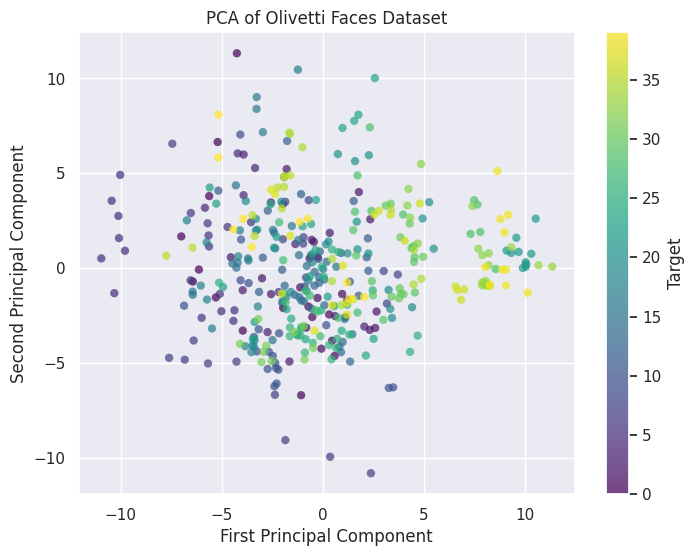

In [28]:
# Apply PCA with 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# Scatter plot of the first two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.target, edgecolor='none', alpha=0.7, cmap='viridis')
plt.colorbar(label='Target')
plt.title('PCA of Olivetti Faces Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


plt.show()

**Explained Variance**

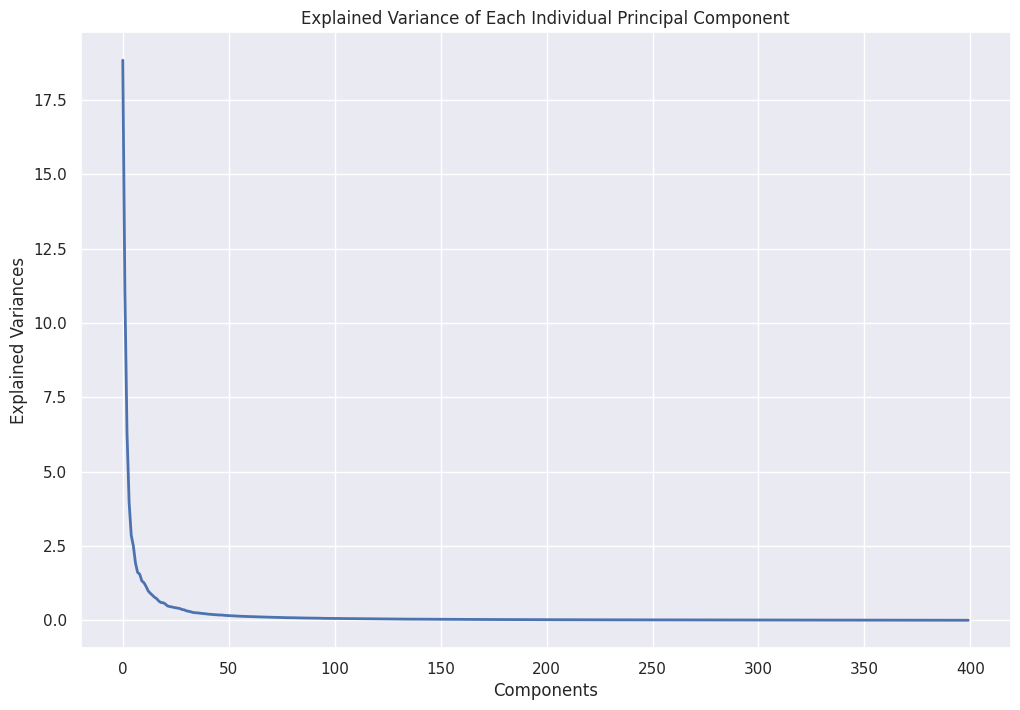

In [29]:
# Apply PCA
pca = PCA().fit(X)

# Explained variance of each component
explained_variance = pca.explained_variance_

# Plotting the explained variance of each individual principal component
plt.figure(figsize=(12, 8))
plt.plot(explained_variance, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.title('Explained Variance of Each Individual Principal Component')
plt.show()


**Applying PCA on 90 components**

Original number of features: 4096
Reduced number of features: 66


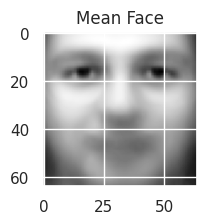

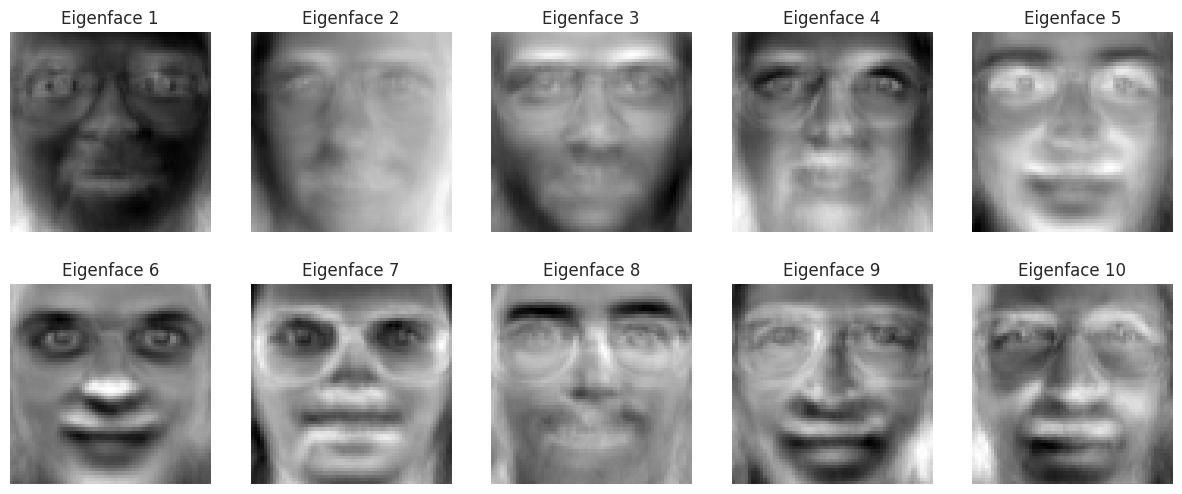

In [30]:
#PCA for 90 components
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reshape the images to a 2D array (samples, features)
X = olivetti_faces.images.reshape((olivetti_faces.images.shape[0], -1))
y = olivetti_faces.target

# chose 90% of variance to keep
pca = PCA(n_components=0.9, whiten=True)
X_pca = pca.fit_transform(X)

# The number of components can be determined from the fitted PCA object
n_components = pca.n_components_

print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {n_components}")

# visualize the mean face and some of the principal components (eigenvectors)
mean_face = pca.mean_.reshape(olivetti_faces.images[0].shape)
eigenfaces = pca.components_.reshape((n_components, olivetti_faces.images.shape[1], olivetti_faces.images.shape[2]))

# Plot the mean face
plt.figure(figsize=(2, 2))
plt.imshow(mean_face, cmap='gray')
plt.title("Mean Face")
plt.show()

# Plot the first few eigenfaces
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f"Eigenface {i+1}")
    ax.axis('off')
plt.show()


**Plotting eigenfaces**

IndexError: ignored

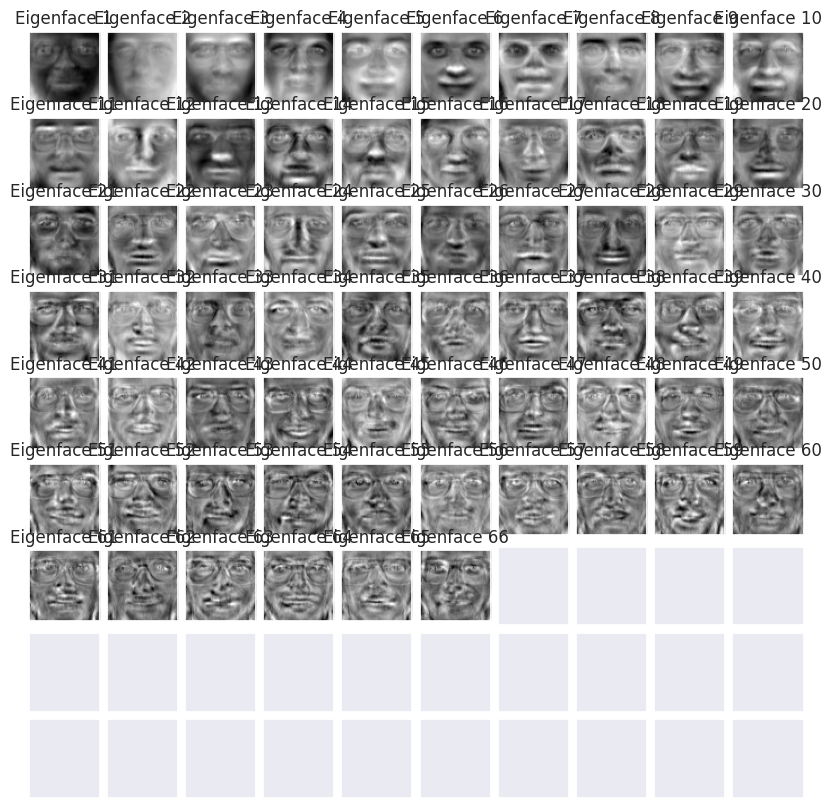

In [32]:
# Plot the eigenfaces
fig, axes = plt.subplots(9, 10, figsize=(15, 15),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
    ax.set_title(f"Eigenface {i+1}")

plt.suptitle("Top 90 Eigenfaces - Olivetti Faces Dataset")
plt.show()

**Fearure Imputation**

In [33]:
#feature Imputation

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.impute import SimpleImputer

# Load Olivetti faces dataset
data = fetch_olivetti_faces()
X = data.images.reshape((data.images.shape[0], -1))  # Reshape the images to a 2D array

# Introducing artificial missing values for demonstration
# ( this dataset does not have missing values)
np.random.seed(0)
missing_values = np.random.choice(X.size, int(X.size * 0.1), replace=False)  # 10% missing
X.ravel()[missing_values] = np.nan

# Creating the imputer object
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the data and transform the data
X_imputed = imputer.fit_transform(X)

# Check the shape of the imputed data
print(X_imputed.shape)


(400, 4096)


**Data Augmentation**

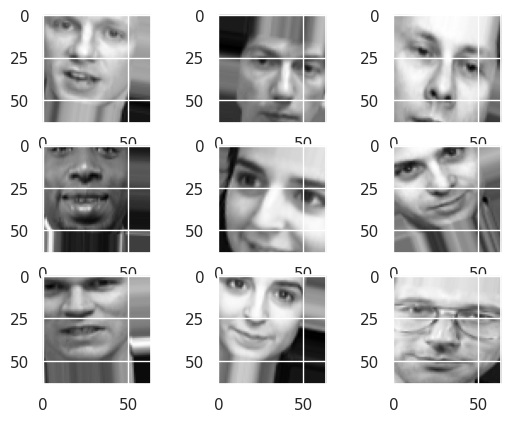

In [34]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Reshape the data to add a channel dimension (grayscale images)
X = images.reshape(images.shape[0], images.shape[1], images.shape[2], 1)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # random rotation
    width_shift_range=0.2,   # random horizontal shifts
    height_shift_range=0.2,  # random vertical shifts
    zoom_range=0.2,          # random zoom
    horizontal_flip=True,    # random horizontal flip
    fill_mode='nearest'
)

# Configure batch size and retrieve one batch of images
for X_batch, _ in datagen.flow(X, y=np.zeros(len(X)), batch_size=9, shuffle=False):
    # Create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(64, 64), cmap=plt.get_cmap('gray'))
    # Show the plot
    plt.show()
    break


**Label Distibution**

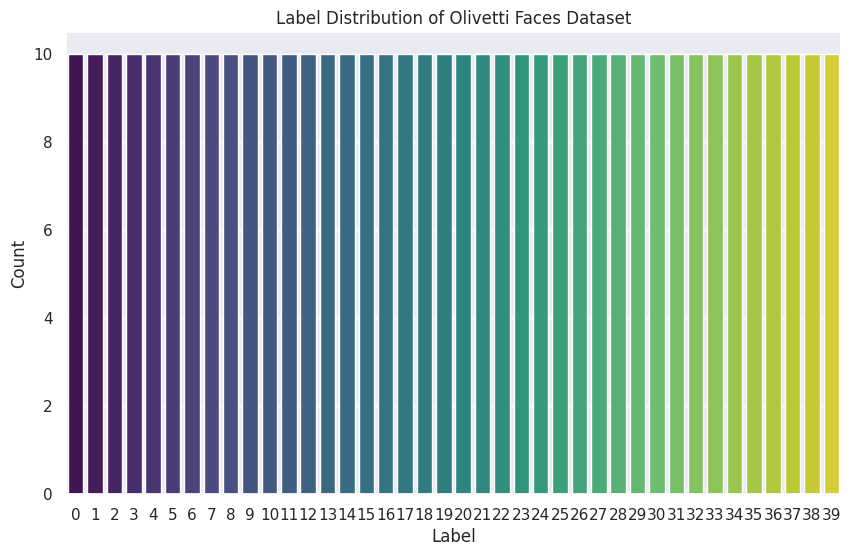

In [35]:
#Label distribution
import seaborn as sns

# Plot the label distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=target, palette='viridis')
plt.title('Label Distribution of Olivetti Faces Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

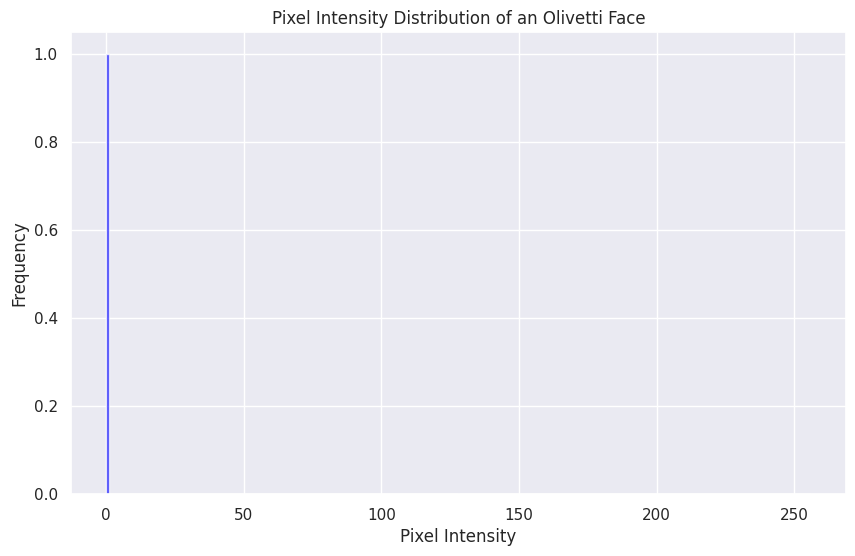

In [36]:
# Plot the pixel intensity distribution
plt.figure(figsize=(10, 6))
plt.hist(flat_images[0], bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution of an Olivetti Face')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [37]:
# Display the dimensionality of the feature space
num_pixels = flat_images.shape[1]
print(f"The dimensionality of the feature space is: {num_pixels} pixels")


The dimensionality of the feature space is: 4096 pixels


**LDA(Linear Discriminant Analysis)**

In [41]:
#Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


# Apply ingLinear Discriminant Analysis
lda = LDA()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Using a classifier (like KNN) after applying LDA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lda, y_train)

# Predictions and accuracy
y_pred = knn.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.95


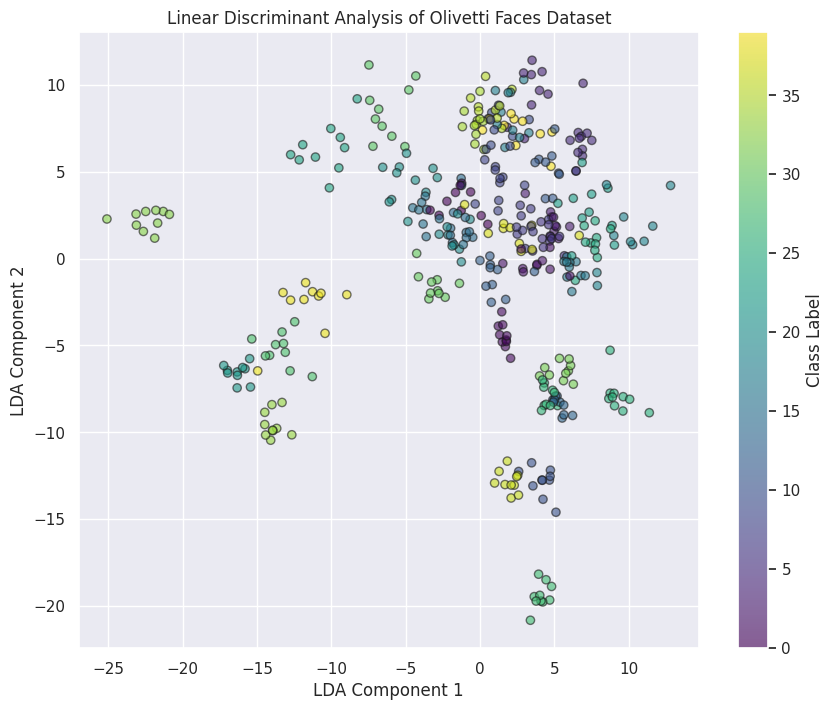

In [42]:
# Applying Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)  # Reduce to 2 dimensions for visualization
X_lda = lda.fit_transform(X, y)

# Plot the transformed data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.6)
plt.colorbar(scatter, label='Class Label')
plt.title('Linear Discriminant Analysis of Olivetti Faces Dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

**K-Nearest Neighbour Model**

Accuracy: 0.79


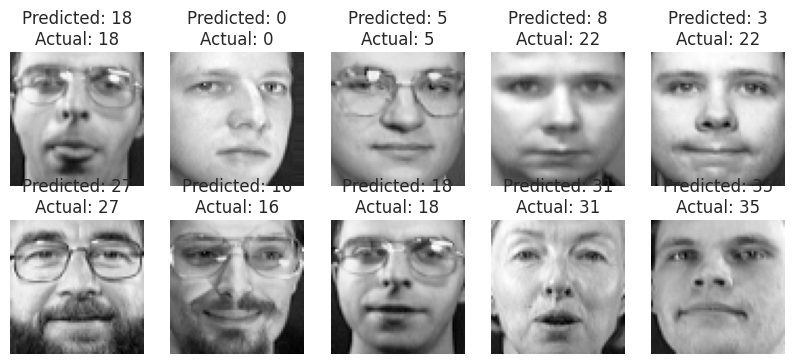

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a few example predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(64, 64), cmap='gray')
    ax.set_title(f"Predicted: {y_pred[i]}\nActual: {y_test[i]}")
    ax.axis('off')

plt.show()




**Support Vector Machine model**

Accuracy: 0.94


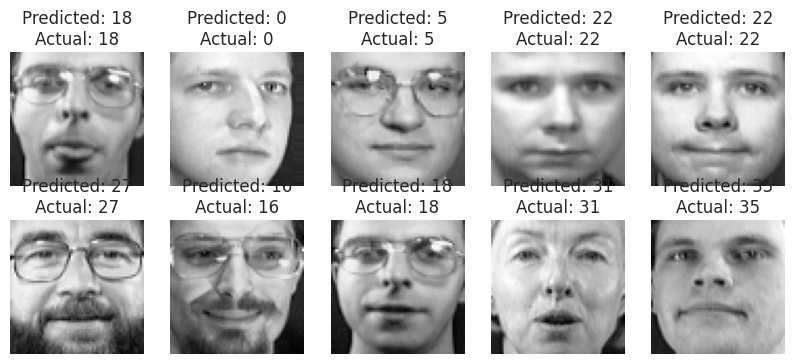

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics


# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a few example predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(64, 64), cmap='gray')
    ax.set_title(f"Predicted: {y_pred[i]}\nActual: {y_test[i]}")
    ax.axis('off')

plt.show()




**Decision Tree**

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize the Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
decision_tree_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))




Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      1.00      0.67         1
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         3
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         3
           9       1.00      0.50      0.67         2
          10       0.50      1.00      0.67         1
          11       1.00      1.00      1.00         1
          12       0.17      0.33      0.22         3
          13       0.50      0.50      0.50         2
          14       0.50      0.50      0.50         4
          15       0.50      1.00      0.67         1
          16       0.67      1.00      0.80         2
          17       0.20      0.50      0.29         2
          18

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**Random Forest**

In [47]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Creating a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
random_forest.fit(X_train, y_train)

# Making predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluating the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Displaying classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 91.25%
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      0.33      0.50         3
           4       1.00      0.75      0.86         4
           5       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.60      1.00      0.75         3
          13       1.00      1.00      1.00         2
          14       1.00      0.75      0.86         4
          15       0.00      0.00      0.00         1
          16       0.67      1.00      0.80         2
          17       1.00      1.00      1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)

# Train the classifier
log_reg.fit(X_train, y_train)

# Predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Displaying classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9375
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      0.33      0.50         3
           4       1.00      0.75      0.86         4
           5       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.75      1.00      0.86         3
          13       1.00      1.00      1.00         2
          14       0.67      1.00      0.80         4
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


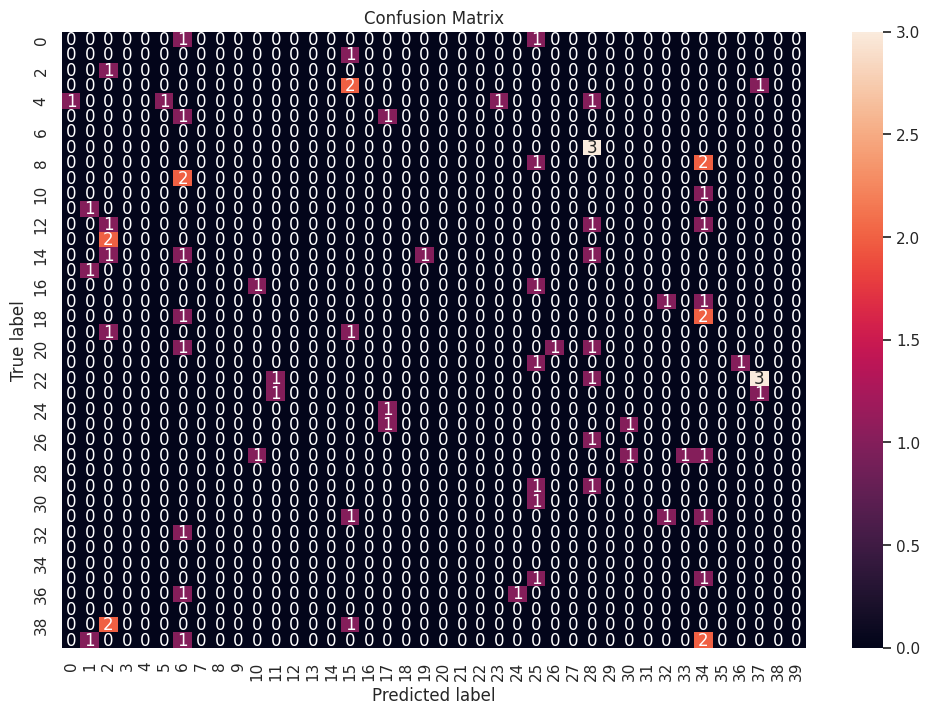

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns  # For a nicer confusion matrix visualization

# Train a classifier
svm = SVC()
svm.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = svm.predict(X_test_pca)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


**Hyperparameter Tuning**

In [52]:
#Hyperparameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import numpy as np


# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf'
    'kernel': ['rbf']  # Type of SVM kernel
}

# Initialize the GridSearchCV with SVM model and parameter grid
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_svm = grid_search.best_estimator_
test_accuracy = best_svm.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=0.1, gamma=0.01

**Bagging**

In [53]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize a base classifier
base_cls = DecisionTreeClassifier()

# Initialize the Bagging classifier with the base classifier
bagging_cls = BaggingClassifier(base_estimator=base_cls, n_estimators=100, random_state=42)

# Train the Bagging classifier
bagging_cls.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_cls.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8125

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.50      1.00      0.67         1
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         3
           4       1.00      0.75      0.86         4
           5       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.75      1.00      0.86         3
          13       1.00      1.00      1.00         2
          14       0.80      1.00      0.89         4
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         2
          17       0.67      1.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Initialize a base classifier
base_cls = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost with the base classifier
ada_boost = AdaBoostClassifier(base_estimator=base_cls, n_estimators=100, random_state=42)

# Train AdaBoost classifier
ada_boost.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_boost.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Classifier Accuracy: 0.1125
